# Analysis of Medical Appointments (Vitória, Brazil in May 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis I will explore a dataset containing 100,000 medical appointments at various hospitals in the city of Vitória in the state of Espírito Santo in Brazil. Special emphasis will be put on investigating if patient age or waiting time from having scheduled an appointment are related to no-show rates for doctors appointments

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The meaning of the columns in the dataset are as follows:
- PatientId: A unique identifier for a patient
- AppointmentID: A unique identifier for a single appointment
- Gender: The patient's gender
- ScheduledDay: The date and time at which the appointment was scheduled
- AppointmentDay: The actual date of the appointment
- Age: The age of the patient
- Neighbourhood: The neighbourhood (and associated Hospital) where the appointment is taking place
- Scholarship: whether the patient is part of the Bolsa Família welfare program
- Hipertension: whether the patient suffers from hypertension
- Diabetes: whether the patient suffers from diabetes
- Alcoholism: whether the patient suffers from alcoholism
- Handcap: the degree of disability of the patient
- SMS_received: whether or not the patient received an SMS with the appointment information
- No-show: whether or not the patient showed up for the appointment

There seem to be no values missing, but the `ScheduledDay` and `AppointmentDay` columns are interpreted as strings instead of datetime.

In [5]:
# convert datetime-string for ScheduledDay and AppointmentDay to proper datetime type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [6]:
# convert No-show column values: Yes -> 1, No -> 0. 
# This makes it easier to use summary-statistics like the mean for the No-show column
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [7]:
# check if we have duplicated AppointmentIDs and (PatientId, AppointmentID) pairs. These would be problematic - duplicate PatientIds are fine due to the fact that people can have multiple appointments
df[['PatientId', 'AppointmentID']].duplicated().value_counts()

False    110527
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Data Cleaning

Since there are no null/missing values, it might be a good idea to check the `ScheduledDay`, `AppointmentDay` and `Age` columns for plausibility

In [9]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
# An age of -1 does not make sense, we seem to have an issue there
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [11]:
missing_age_patient_id = df.at[99832, 'PatientId']

In [12]:
df[df.PatientId == missing_age_patient_id]['AppointmentID'].count()

1

In [13]:
# Since there are no further appointments for this patient and nothing else out of the ordinary, it should be okay to backfill the average age for this patient
mean_age = df.Age.mean()
print(mean_age)

37.08887421173107


In [14]:
df.at[99832, 'Age'] = mean_age

In [15]:
df.at[99832, 'Age']

37

Now on to the date columns. Since Scheduled Day is the day of the Appointment being scheduled, it should have taken place before the Appointment/Appointment-date

One thing to notice is the additional precision on the ScheduleDay - there is a time of day available for the ScheduleDay, while the AppointmentDay seems to be lacking this information.

In [16]:
df['waiting_time_until_appointment'] = df['AppointmentDay'] - df['ScheduledDay']

In [17]:
df['waiting_time_until_appointment']

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Name: waiting_time_until_appointment, Length: 110527, dtype: timedelta64[ns]

There seem to be a couple of instances where the schedule day/time is after the appointment-date. This needs to be investigated further

In [18]:
import datetime

In [19]:
scheduled_after_appointment = df[df['waiting_time_until_appointment'] < datetime.timedelta(0)]

In [20]:
scheduled_after_appointment

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time_until_appointment
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,8.235996e+11,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,0,-1 days +15:09:40
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,0,-1 days +15:39:59
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,0,-1 days +16:07:05
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,0,-1 days +15:24:29


In [21]:
scheduled_after_appointment.describe()['waiting_time_until_appointment']

count                          38568
mean     -1 days +13:18:03.704807094
std        0 days 03:07:36.671644507
min                -7 days +10:10:40
25%         -1 days +10:44:12.750000
50%         -1 days +14:14:25.500000
75%         -1 days +15:52:27.250000
max                -1 days +17:50:24
Name: waiting_time_until_appointment, dtype: object

There seems to be a high number of "same-day" appointments, that we categorized as scheduled after appointment due to the lack of the time-of-day for the appointment. Thus, we need to remove those 'same-day' appointments from the `scheduled_after_appointment` frame

In [22]:
scheduled_after_appointment = scheduled_after_appointment[scheduled_after_appointment.ScheduledDay.dt.day != scheduled_after_appointment.AppointmentDay.dt.day]

In [23]:
scheduled_after_appointment

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time_until_appointment
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-2 days +13:08:07
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-2 days +09:09:19
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-2 days +10:16:02
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-7 days +10:10:40
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-2 days +17:09:03


Now we have a numer of appointments left which do seem to have faulty (possibly backdated?) ScheduledDay or AppointmentDay values. What stands out is that all of these appointments are indeed No-shows. This this could possibly and error in the scheduling-software of the hospitals

One final point of interest would be, if the patients associated with these appointments had further appointments

In [24]:
df[df.PatientId.isin(scheduled_after_appointment['PatientId'])].groupby('PatientId')['AppointmentID'].count()

PatientId
3.787482e+12    5
7.839273e+12    5
7.896294e+12    8
2.425226e+13    2
9.982316e+14    3
Name: AppointmentID, dtype: int64

In [25]:
df[df.PatientId.isin(scheduled_after_appointment['PatientId'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time_until_appointment
3370,7.839273e+12,5730318,M,2016-05-24 08:27:43+00:00,2016-05-24 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,-1 days +15:32:17
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-2 days +13:08:07
35377,7.896294e+12,5653953,F,2016-05-03 13:34:37+00:00,2016-05-05 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,1 days 10:25:23
53235,7.896294e+12,5717383,F,2016-05-19 07:54:32+00:00,2016-05-19 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1 days +16:05:28
53250,7.896294e+12,5692824,F,2016-05-12 16:24:16+00:00,2016-05-12 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1 days +07:35:44
53310,7.896294e+12,5693085,F,2016-05-12 17:36:32+00:00,2016-05-12 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1 days +06:23:28
54692,2.425226e+13,5657354,F,2016-05-04 09:15:43+00:00,2016-05-19 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,14 days 14:44:17
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-2 days +09:09:19
55289,7.896294e+12,5715663,F,2016-05-18 14:51:10+00:00,2016-05-18 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1 days +09:08:50
55687,7.896294e+12,5692821,F,2016-05-12 16:23:09+00:00,2016-05-12 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1 days +07:36:51


All of patients that had a 'mis-scheduled'-appointment had further appointments. It is probably a good idea to keep an eye on this. In order to allow us to easily check this, I'll go ahead and add a `misscheduled` column

In [26]:
df['misscheduled'] = df.AppointmentID.isin(scheduled_after_appointment['AppointmentID'])

In [27]:
df[df.misscheduled]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time_until_appointment,misscheduled
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-2 days +13:08:07,True
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-2 days +09:09:19,True
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-2 days +10:16:02,True
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-7 days +10:10:40,True
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-2 days +17:09:03,True


The data should now be sufficiently prepared for exploration

<a id='eda'></a>
## Exploratory Data Analysis

### Is there a relationship between age and no-show appointment rates?

First I want to get an overview of the shape of the age distribution in this sample

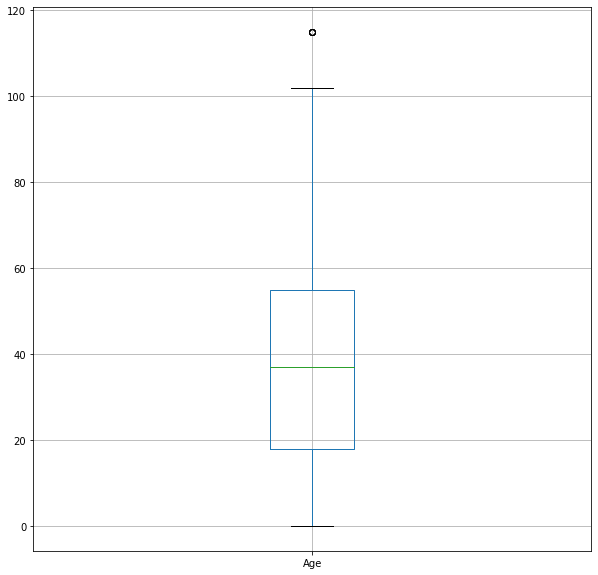

In [28]:
df.boxplot(column=['Age'], figsize=(10,10));

In [29]:
df.describe()['Age']

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Most of the people are between 18 and 55 year old, with an average age of 37 years. There is one outlier at 115 years old.

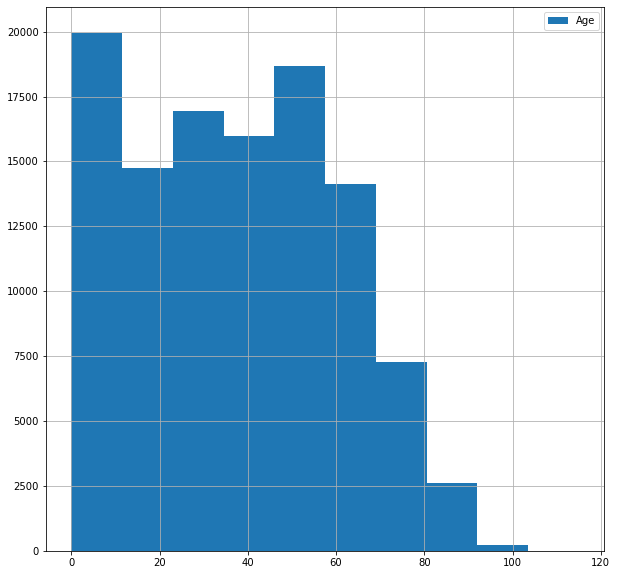

In [30]:
df.Age.hist(figsize=(10, 10), legend=True);

I will now split the patients up into groups based on the quartiles.
- 0 to 18 year olds will be classified as `kids`
- 19 to 37 year olds will be classified as `young`
- 38 to 55 year olds will be classified as `middle_aged`
- 56 and onward will be classified as `old`

In [31]:
df['age_group'] = pd.qcut(df.Age, 4, labels=['kids', 'young', 'middle_aged', 'old'])

In [32]:
df['age_group'].head()

0     old
1     old
2     old
3    kids
4     old
Name: age_group, dtype: category
Categories (4, object): ['kids' < 'young' < 'middle_aged' < 'old']

I would now like to investigate how the rate of no show appointments looks for the different age groups

In [33]:
no_show_by_age = df.groupby('age_group')['No-show']

In [34]:
no_show_by_age.describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
kids,28866.0,0.219878,0.414171,0.0,0.0,0.0,0.0,1.0
young,27251.0,0.235368,0.424236,0.0,0.0,0.0,0.0,1.0
middle_aged,26906.0,0.195310,0.396446,0.0,0.0,0.0,0.0,1.0
old,27504.0,0.156450,0.363288,0.0,0.0,0.0,0.0,1.0


In [35]:
no_show_rates_by_age = no_show_by_age.mean()

In [36]:
no_show_rates_by_age = no_show_rates_by_age.rename(index={'kids': 'Kids (0y - 18y)', 'young': 'Young Adults (19y - 37y)', 'middle_aged': 'Middle Aged Adults (38y - 55y)', 'old': 'Old Adults (56y+)'})

In [37]:
no_show_rates_by_age = no_show_rates_by_age.apply(lambda x: round(x * 100, 2))

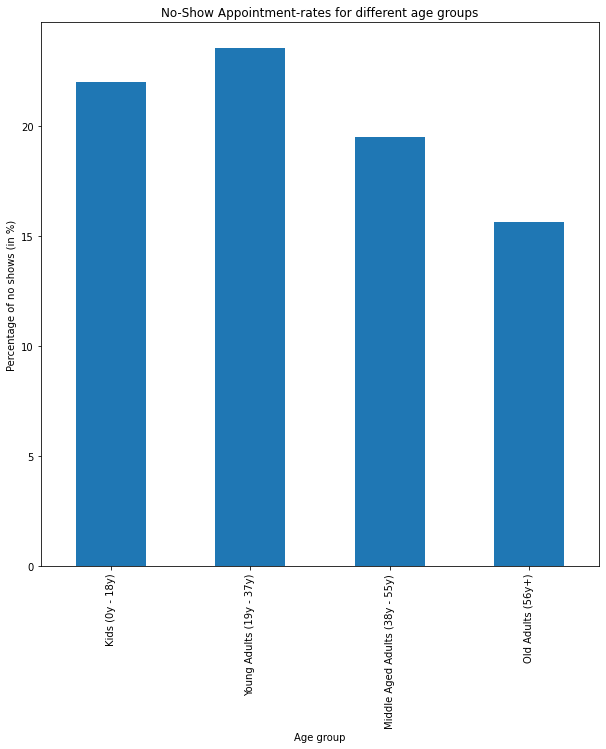

In [38]:
no_show_rates_by_age.plot(kind='bar', figsize=(10, 10), title='No-Show Appointment-rates for different age groups', xlabel='Age group', ylabel='Percentage of no shows (in %)');

After a small increase in no-show rates from the age-group of Kids to Young Adults, there seems to be indeed a downward trend where the amount of No-Show-Appointments seems to decrease with increased age.

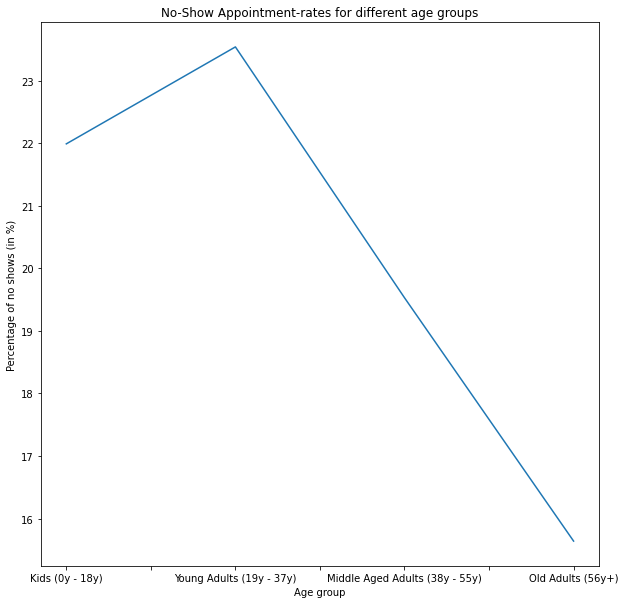

In [39]:
no_show_rates_by_age.plot(kind='line', figsize=(10, 10), title='No-Show Appointment-rates for different age groups', xlabel='Age group', ylabel='Percentage of no shows (in %)');

### Is there a relationship between length of waiting time for the appointment and no-show rates?

First a look at the distribution of the waiting times in the dataset

In [40]:
df['waiting_time_until_appointment'].describe()

count                        110527
mean      9 days 17:08:34.161960424
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
Name: waiting_time_until_appointment, dtype: object

Taking a look back at the 'misscheduled' appointments we have identified earlier:

In [41]:
df[df.misscheduled]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time_until_appointment,misscheduled,age_group
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-2 days +13:08:07,True,middle_aged
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-2 days +09:09:19,True,young
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-2 days +10:16:02,True,young
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-7 days +10:10:40,True,old
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-2 days +17:09:03,True,kids


In [42]:
df[df.misscheduled]['No-show']

27033    1
55226    1
64175    1
71533    1
72362    1
Name: No-show, dtype: int64

All of these are indeed No-Show appointments. Since we want to look at the relationship of waiting-time and no-show rates, we can treat these as outliers. I will thus drop them

In [43]:
df.drop(df[df.misscheduled].index, inplace=True)

In [44]:
df.drop(axis=1, labels='misscheduled', inplace=True) # we do not need the misscheduled column anymore

In [45]:
df['waiting_time_until_appointment'].describe()

count                        110522
mean      9 days 17:09:21.907927831
std      15 days 05:51:38.019538861
min               -1 days +03:15:06
25%        -1 days +15:41:34.250000
50%          3 days 11:23:40.500000
75%         14 days 07:41:43.250000
max               178 days 13:19:01
Name: waiting_time_until_appointment, dtype: object

In [46]:
df['waiting_group'] = pd.qcut(df.waiting_time_until_appointment, 4, labels=['same_day', 'a_few_days', 'up_to_two_weeks', 'two_weeks_and_more'])

In [47]:
no_show_by_waiting_time = df.groupby('waiting_group')['No-show'].mean()

In [48]:
no_show_by_waiting_time.rename({'same_day': 'Same Day', 'a_few_days': 'Up to a few days', 'up_to_two_weeks': 'Up to two weeks', 'two_weeks_and_more': 'Two weeks and more'}, inplace=True)

In [49]:
no_show_by_waiting_time = no_show_by_waiting_time.apply(lambda x: round(x * 100, 2))

In [50]:
no_show_by_waiting_time

waiting_group
Same Day               4.70
Up to a few days      15.65
Up to two weeks       27.73
Two weeks and more    32.68
Name: No-show, dtype: float64

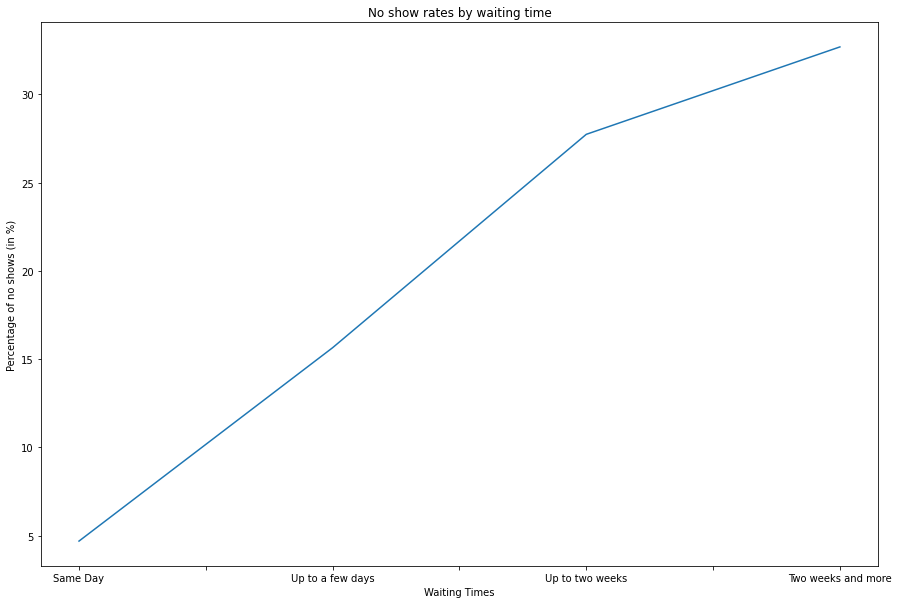

In [51]:
no_show_by_waiting_time.plot(kind='line', figsize=(15, 10),title='No show rates by waiting time', xlabel='Waiting Times', ylabel='Percentage of no shows (in %)');

It is clearly visible that there is a relationship between the waiting time (date scheduled to appointment day) and the rate of no-show appointments. A longer waiting period seems to be associated with a higher rate of no-show appointments

<a id='conclusions'></a>
## Conclusions

In this project I investigated how waiting times until an appointment and the age group of a patient relate to the no-show rate in these respective groups. It became visible that from adulthood on, higher age seems to be associated with lower rates of doctor appointment no-show rates. Furthermore, longer times waiting times from scheduling a doctors appointment until finally seeing the doctor seem to be associated with higher appointment no-show-rates.
